In [118]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader,random_split
import matplotlib.pyplot as plt

In [188]:
df = pd.read_csv('data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [257]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.run = nn.Sequential(nn.Linear(11,32),
                                nn.ReLU(),
                                nn.Linear(32,64),
                                nn.ReLU(),
                                 
                                nn.Linear(64,128),
                                nn.ReLU(),
                                nn.Linear(128,256),
                                nn.ReLU(),
                                
                                nn.Dropout(0.5),
                                
                                nn.Linear(256,128),
                                nn.ReLU(),
                                nn.Linear(128,64),
                                nn.ReLU(),
                                
                                nn.Linear(64,32),
                                nn.ReLU(),
                                nn.Linear(32,1))
    def forward(self,x):
        return self.run(x)

In [258]:
class MuData(Dataset):
    def __init__(self):
        df1= pd.read_csv('data/boston.csv')
        del df1['B']
        del df1['RAD']
        
        self.len = len(df1)
        self.data = df1
    def __len__(self):
        return self.len
    def __getitem__(self, idx):
        
        target = torch.tensor(self.data.iloc[idx].tolist()[11])
        sample = torch.tensor(self.data.iloc[idx].tolist()[0:11])
        return target, sample
        
        

In [259]:
data = MuData()
train_set, val_set = random_split(data,[0.8,0.2])
train_loader = DataLoader(train_set,batch_size=8,shuffle=True)
val_loader = DataLoader(val_set,batch_size=8,shuffle=False)



In [264]:
model = Model()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

train_loss = []
val_loss = []


In [273]:
lr = 0.0001
Epochs = 7

In [274]:
for param_group in optimizer.param_groups:
    param_group['lr'] = lr

for epoch in range(Epochs):
    
    mean_loss = []
    correct = 0
    total = 0
    
    model.train()
    for target,x in train_loader:
        target = target.unsqueeze(1)
        prediction = model(x)
        loss = loss_fn(prediction,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mean_loss.append(loss.item())
        
        
    mean = sum(mean_loss)/len(mean_loss)
    print(f'Train_Epoch {epoch} Loss: {mean}')
    train_loss.append(mean)
    mean_loss = []
    
    model.eval()
    for target,x in val_loader:
        target = target.unsqueeze(1)
        prediction = model(x)
        loss = loss_fn(prediction,target)
        mean_loss.append(loss.item())
        
        
    mean = sum(mean_loss)/len(mean_loss)
    print(f'Val_Epoch {epoch} Loss: {mean}')
    val_loss.append(sum(mean_loss)/len(mean_loss))
        
        
    

Train_Epoch 0 Loss: 41.58434210571588
Val_Epoch 0 Loss: 28.60313320159912
Train_Epoch 1 Loss: 44.380419665691896
Val_Epoch 1 Loss: 29.399153782771183
Train_Epoch 2 Loss: 41.242678146736296
Val_Epoch 2 Loss: 28.7043944138747
Train_Epoch 3 Loss: 43.897885453467275
Val_Epoch 3 Loss: 28.568101296058067
Train_Epoch 4 Loss: 40.99866703444836
Val_Epoch 4 Loss: 28.4067199413593
Train_Epoch 5 Loss: 41.02826415791231
Val_Epoch 5 Loss: 28.50599641066331
Train_Epoch 6 Loss: 40.219303925832115
Val_Epoch 6 Loss: 28.39782428741455


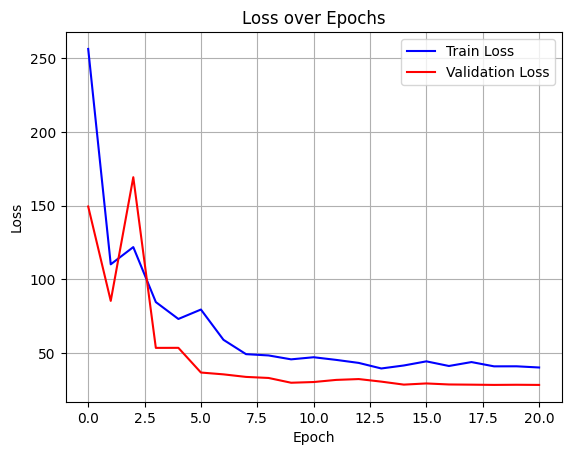

In [275]:
# Построение графика
plt.plot(train_loss, label='Train Loss', color='blue')  # Синим график обучающих потерь
plt.plot(val_loss, label='Validation Loss', color='red')   # Отображаем график потерь
plt.xlabel('Epoch')  # Подпись оси X (например, эпохи)
plt.ylabel('Loss')  # Подпись оси Y (значения потерь)
plt.title('Loss over Epochs')  # Заголовок графика
plt.legend()  # Легенда
plt.grid(True)  # Включение сетки
plt.show() 

In [283]:
def truth(predict, target):
    return abs(predict - target) <= 1

correct = 0
total = 0
model.eval()

for target, x in data:
    prediction = model(x)
    if truth(prediction, target):
        correct += 1
    total += 1
print(f'Accuracy: {correct / total}\n'
      f'correct: {correct}\n'
      f'total: {total}')

    

Accuracy: 0.17588932806324112
correct: 89
total: 506
